In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
image = cv2.imread('/content/sample_data/yuki.png', cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
mask = cv2.imread('/content/sample_data/yuki_mask.png', cv2.IMREAD_COLOR)  # Предварительно заданная маска
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)

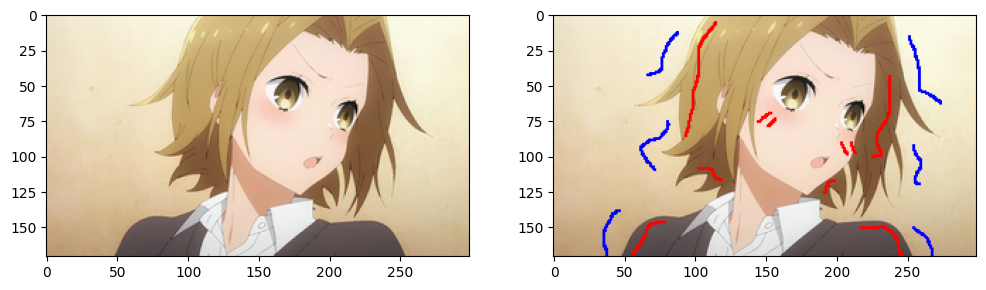

In [3]:
plt.figure(figsize=(12,8))
plt.subplot(121)
plt.imshow(image)
plt.subplot(122)
plt.imshow(mask)
plt.show()

In [6]:
# 0 - Nan
# 1 - Background
# 2 - Foreground
def get_mask(mask):
    result = np.zeros((mask.shape[0], mask.shape[1]), np.uint8)
    for i in range(mask.shape[0]):
        for j in range(mask.shape[1]):
            if (mask[i][j][0] == 0) and (mask[i][j][1] == 0) and (mask[i][j][2] == 255):
                result[i][j] = 1
            if (mask[i][j][0] == 255) and (mask[i][j][1] == 0) and (mask[i][j][2] == 0):
                result[i][j] = 2

    return result

In [5]:
# L2 norm for pixels
def g(x, y):
    return 1 / (np.sqrt(np.sum((x - y) ** 2)) + 1E-05)

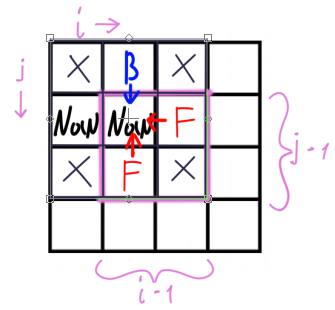

In [9]:
# Growcut realization
def growcut(image, mask, iterations=10):
    height, width, _ = image.shape
    mask = get_mask(mask)

    # initial cells force rate
    theta_q = 1
    theta_p = 0.062


    for iteration in range(iterations):
      # print stats
      if (iteration % 2 == 0):
          plt.imshow(mask)
          plt.show()
      print(iteration, end=' ')

      # restriction for proper sizing
      for i in range(1, height-1):
          for j in range(1, width-1):
              winner = mask[i, j]
              force_max = 0

              # cellular automaton
              for q in range(-1, 2):
                  for k in range(-1, 2):
                      if (abs(q) == 1 and abs(k) == 1) or (mask[i + q, j + k] == 0): continue # skipping diagonal squares
                      force = g(image[i, j], image[i + q, j + k])

                      # attac condition
                      if force > force_max:
                          winner = mask[i + q, j + k]
                          force_max = force

              if winner != 0:
                if (iteration > 10) or theta_q * force_max > theta_p:
                  mask[i, j] = winner

    return mask

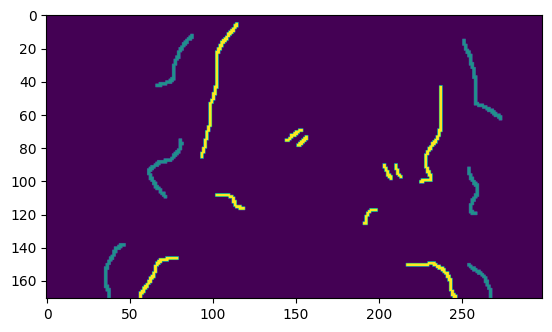

0 1 

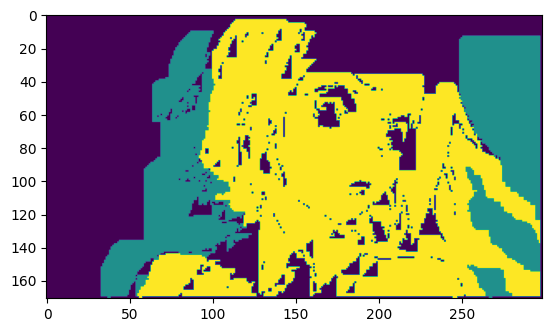

2 3 

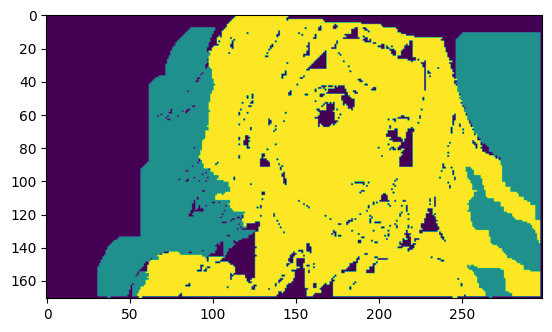

4 5 

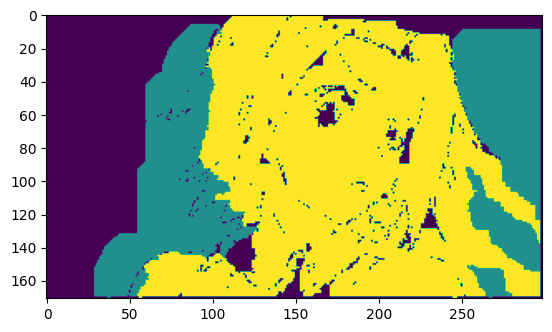

6 7 

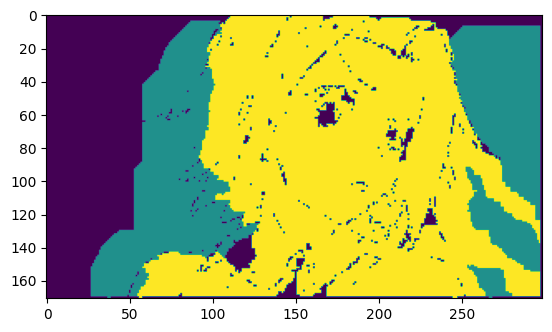

8 9 

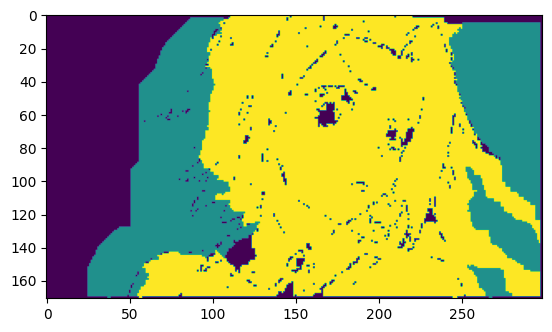

10 11 

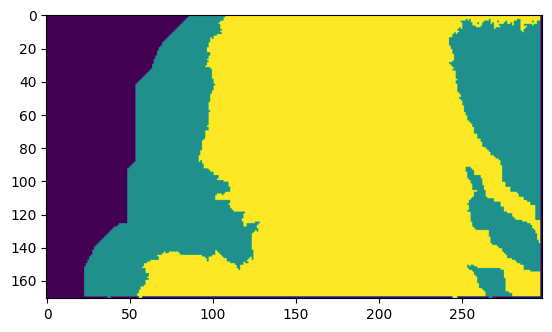

12 13 

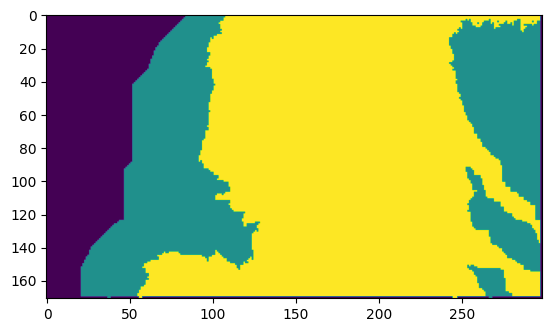

14 15 

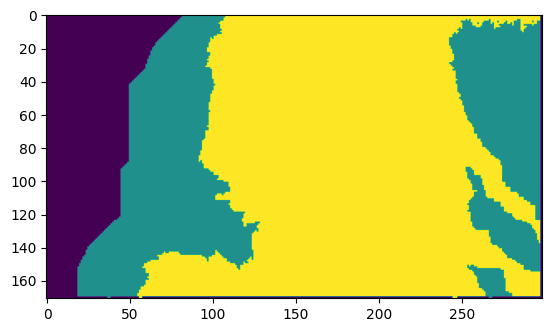

16 17 

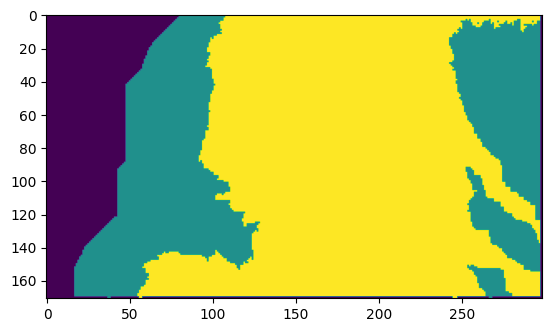

18 19 

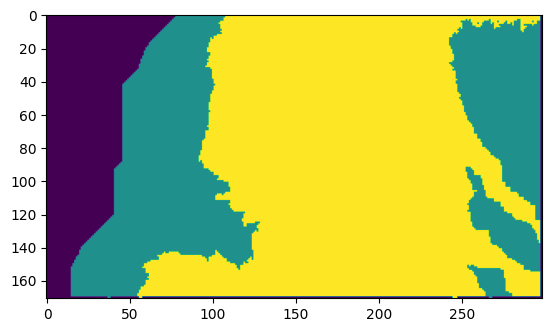

20 21 

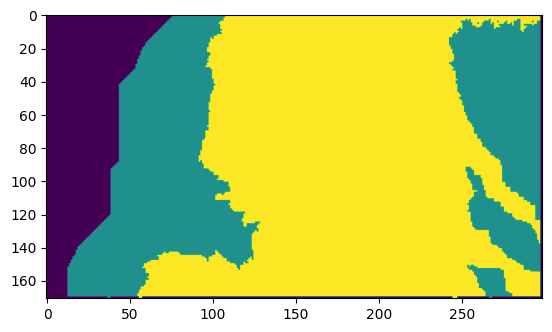

22 23 

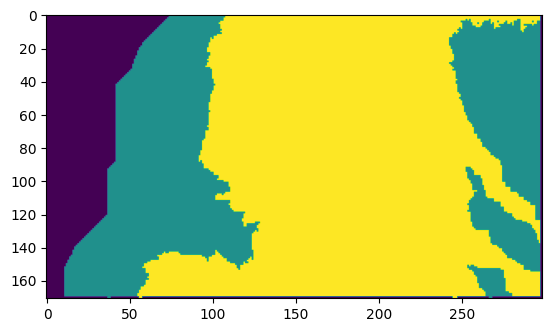

24 25 

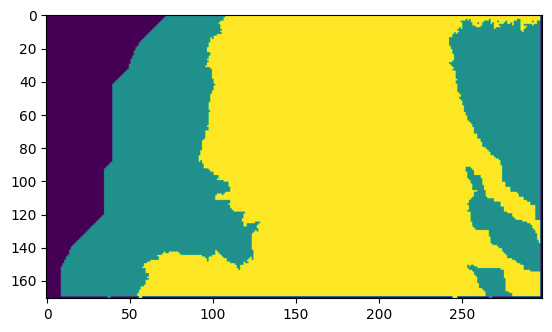

26 27 

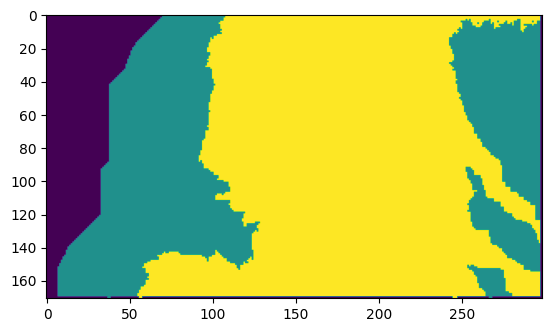

28 29 

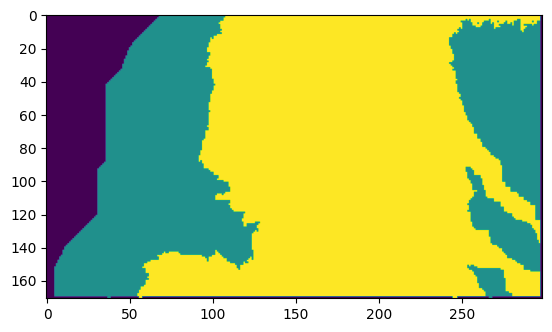

30 31 

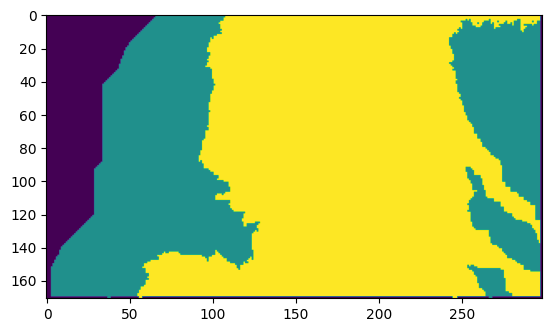

32 33 

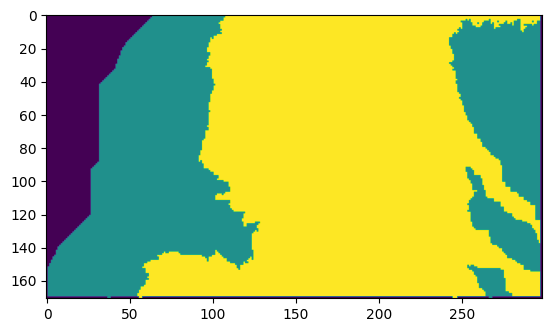

34 35 

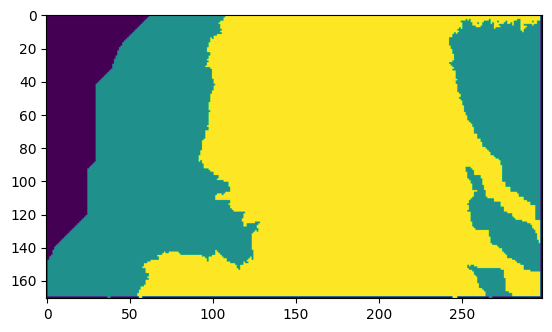

36 37 

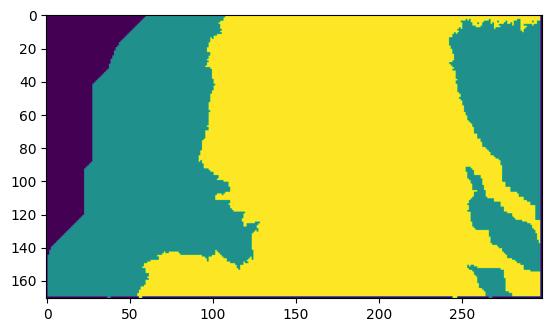

38 39 

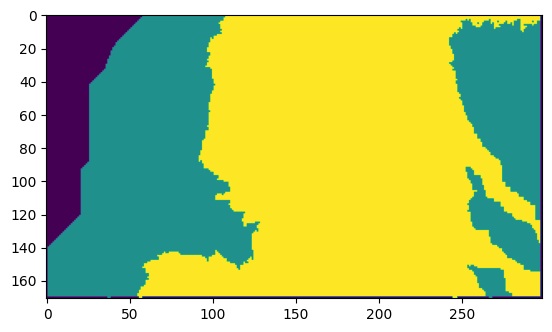

40 41 

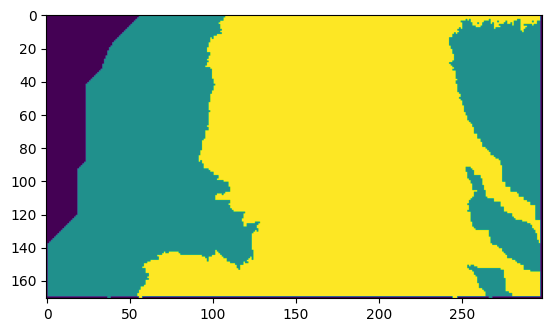

42 43 

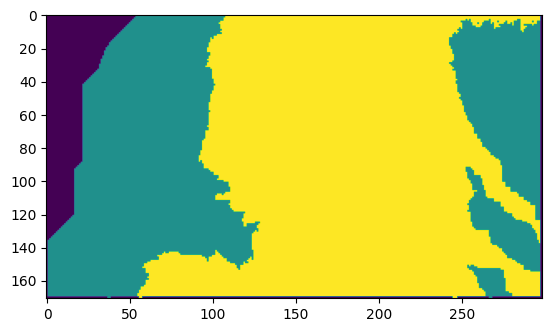

44 45 

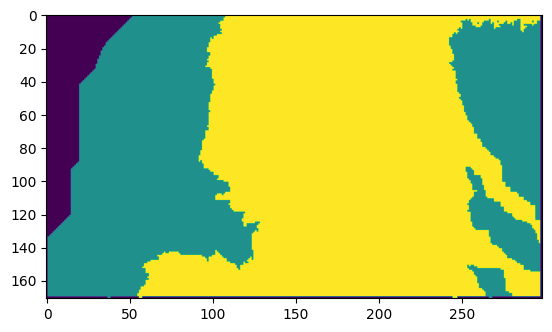

46 47 

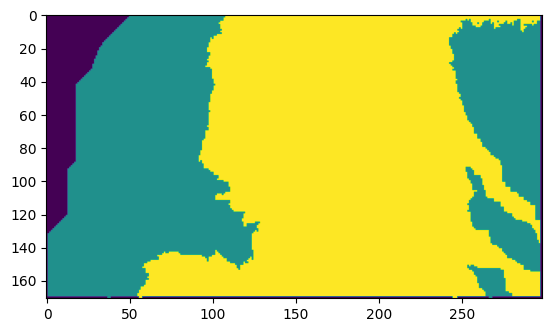

48 49 

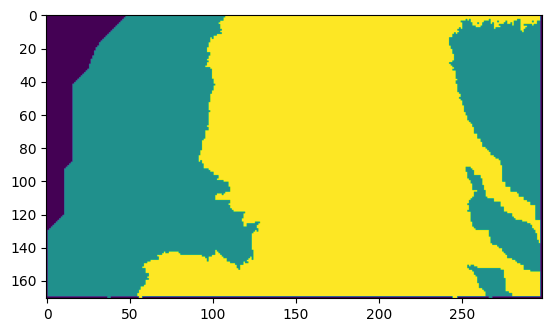

50 

In [10]:
# Growcut mask demonstration
mask_grow = growcut(image, mask, iterations=51)

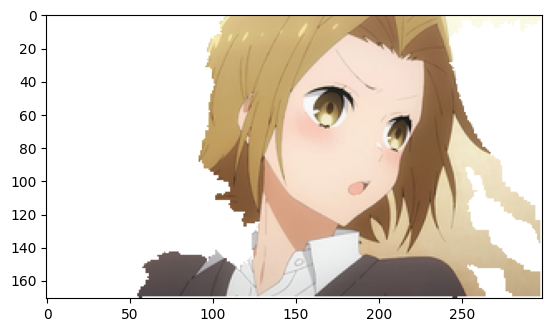

In [11]:
# applying mask
trim = image
for i in range(trim.shape[0]):
    for j in range(trim.shape[1]):
        if mask_grow[i, j] != 2:
            trim[i, j] = [255, 255, 255]
plt.imshow(trim)